# Coded Data Viz and Exploration
This Jupyter notebook is mainly to look at my data now that it has been qualitatively coded!
This is a new, continuing script.

## Qualitative Coding
Unlike coding with something like Python, qualitative coding here is basically just giving an item a discrete value based on some property. In this project, I am looking at how people use algopseak, so my the codes listed in the mention_code column of my CSV/dataframe are split up into four categories of use. 
| Code      | Meaning                                                                                                               |
|-----------|-----------------------------------------------------------------------------------------------------------------------|
| a         | algospeak - The term is being used to censor another term                                                             |
| m         | mention - The term is being mentioned as an algospeak term but not used to censor anything. Can also stand for "meta" |
| n         | not algospeak - The term is not being used as an algospeak term                                                       |
| o         | other - Term is not present or something else                                                                         |

## Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pprint
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Pretty printing has been turned OFF


In [2]:
algo_df = pd.read_csv('algospeak_top_posts.csv')
algo_df.sample(5)

,text,author,display_name,date,likes,quotes,replies,reposts,uri,query,mention_code
121,A farm worker shared this photo with us from an Arizona watermelon field . It's physically demanding work. The loader crew is responsible for picking pick up hundreds of watermelons and loading them into the trailer. #WeFeedYou,ufw.bsky.social,United Farm Workers,2025-02-21T15:00:35.298Z,567,9,14,114,at://did:plc:53pxyzwrw4zx5ft67czyyjyy/app.bsky.feed.post/3lip32fqf6h2l,watermelon,n
23,Hulu really played euphoria after Florida project and lady bird. The platforms is tryin to unalive me I swear,oizysdagreat.hunts.monster,👁️⃤ Wandering Puddleજ⁀➴𓏲 ๋࣭ ࣪,2025-02-20T22:48:34.343Z,5,0,3,0,at://did:plc:2yzoqra7ceusstbelvjda4sz/app.bsky.feed.post/3lineqc764s2f,unalive,a
124,#DailyBat 🖤🦇🖤,afizgig.bsky.social,AlTheColorsOfTheDark🖤🦇🪦,2025-02-23T13:57:15.347Z,62,0,0,6,at://did:plc:sfichlc25a4wuzsqyqauuvq3/app.bsky.feed.post/3litygyic3c2t,watermelon,o
7,I *AM* on vacation and people still wanna unalive me at work.,kingserpentico.bsky.social,SNAKEMAN,2025-02-20T02:26:55.167Z,61,0,3,1,at://did:plc:pv4626x5y7zxxsupflujztqb/app.bsky.feed.post/3lilahsnslk26,unalive,a
138,watermelon wip \n#artist #digitalart #procreate,cryboycries.bsky.social,Cryboycries,2025-02-22T18:05:27.272Z,11,0,0,1,at://did:plc:ao6t7lde3d2cpzpzxo4thciu/app.bsky.feed.post/3lirvtuyofc2x,watermelon,o


In [3]:
# Here you can see the mention codes with context
algo_df[['text','query', 'mention_code']].sample(5)

,text,query,mention_code
139,"First off, the watermelon is a racist trope, and secondly you need to have smoke for the Republicans, the ones who are actually in power and destroying America.",watermelon,n
1,"please for the love of god can we NOT normalise using ""sw"" and ""unalive"" on this app? use real words.\nsex work.\nkill.\ncunt.\n\nthere's no algorithm here.",unalive,m
24,pov: your best friend is a writer and offers to symbolically unalive your ex in a future book 😂,unalive,a
91,Last night tonight\n\n“And there were so many fewer questions\nWhen stars were still just the holes to heaven…”\n~Jack Johnson (2001),palm colored,o
26,"We are in for a battle, it would help if Musk and Trump were unalive!",unalive,a


In [5]:
algo_df.mention_code.value_counts()

mention_code
a    49
n    48
o    41
m    10
Name: count, dtype: int64

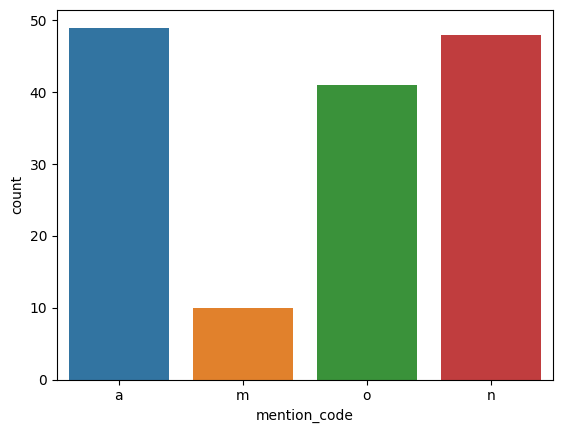

In [12]:
sns.countplot(x = 'mention_code', hue='mention_code', data = algo_df)
plt.show()

You can see here that there wasn't a ton of metadiscourse about algopseak in this sample, but there is a lot of stuff that isn't algospeak here

In [13]:
code_by_term = algo_df.groupby('query').mention_code.value_counts().unstack()
code_by_term

mention_code,a,m,n,o
query,,,,
grape,NaN,NaN,27.0,3.0
palm colored,2.0,1.0,NaN,27.0
seggs,26.0,1.0,NaN,3.0
unalive,21.0,8.0,NaN,NaN
watermelon,NaN,NaN,21.0,8.0


In [14]:
code_by_term = code_by_term.fillna(0)
code_by_term

mention_code,a,m,n,o
query,,,,
grape,0.0,0.0,27.0,3.0
palm colored,2.0,1.0,0.0,27.0
seggs,26.0,1.0,0.0,3.0
unalive,21.0,8.0,0.0,0.0
watermelon,0.0,0.0,21.0,8.0


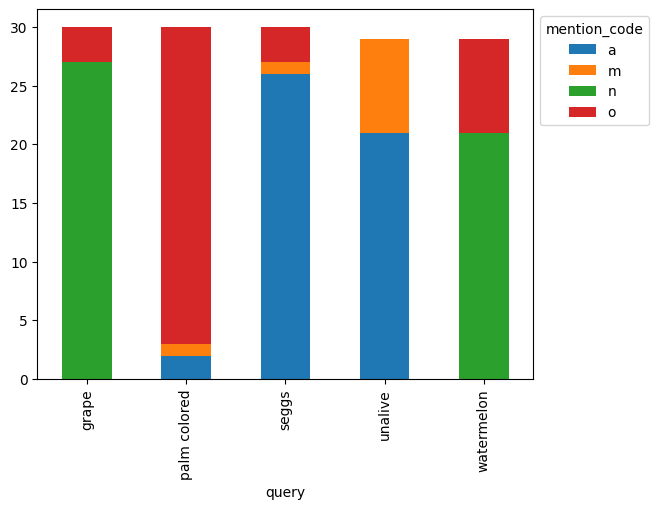

In [25]:
ax = code_by_term.plot(kind='bar', stacked=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

There's a big difference between the terms! There are no algospeak uses for grape or watermelon here, and only a couple for palm-colored. Unalive is really the only term that is unambiguously algospeak in this small dataset.